# Text To Speech Demo

## Info

In [1]:
# - Find the title, main color, and any special info in the package
# picture. # TODO: Return format? Image? ROIS? 


In [2]:
import cv2
import matplotlib.pyplot as plt 
from utils.ImageHandeling import BasicImageHandeling as bh
from utils.ImageHandeling import display_color

# Import module for UI
from utils.RectangleUI import RectangleDrawer
# Import Module
from utils.TextToSpeechFromImage import TextToSpeech as tts
from utils.TextToSpeechFromImage import count_words


In [3]:
image_path = 'assets/DEMO_image.jpg'
image = bh.read_image(image_path)

### Find Dominant Colors

In [4]:
cols = bh.find_dominant_colors(image) # output is rgb

In [5]:
cols

array([[252, 253, 253],
       [  7, 142,  60],
       [ 69, 126, 152]])

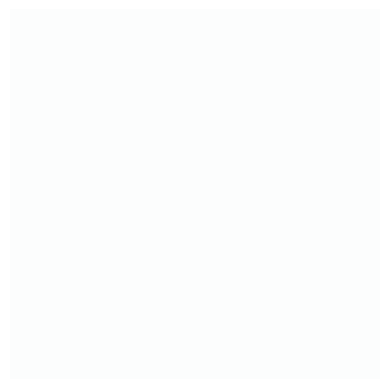

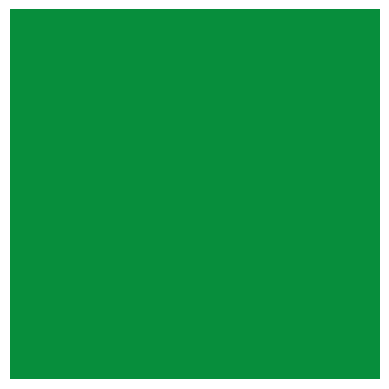

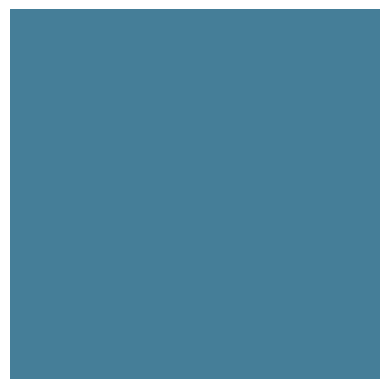

In [6]:
# Display the colors:
for i in cols:
    display_color(i) # Input is rgb

### Find Title

In [7]:
biggest_title = tts.extract_biggest_title(image)
biggest_title

'Alvedon'

## Create ROIs

### Divide Image By Coordinates (ROI)

In [8]:
# TODO: Extra? Create a method that takes the entire image and provides context for the summarized text.

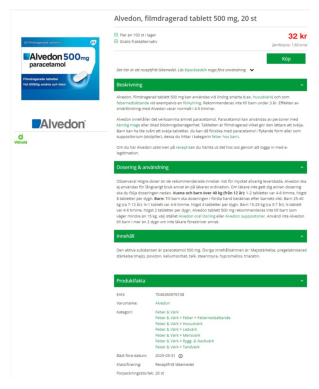

In [9]:

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
image_txt = tts.extract_text_from_image(image)
print(image_txt)

Alvedon, filmdragerad tablett 500 mg, 20 st
(Z Fler än 100 st i lager 32 kr
20 lmdragerade tablette os (Z Gratis fraktalternativ
ä0a S Jämförpris: 1,60 kelst
HAlvedon 500mg
paracetamol
Det här ör ett receptfritt läkemedel. Läs bipacksedeln noga före användning.
Filmdragerade tabletter
vid tilltällig smärta och teber SN Beskrivning d
Alvedon, filmdragerad tablett 500 mg kan användas vid lindrig smärta (t.ex. huvudvärk) och som
febernedsättande vid exempelvis en förkylning. Rekommenderas inte till barn under 3 år. Effekten av
smärtlindring med Alvedon varar normalt i 4-5 timmar.
ä Alvedon innehåller det verksamma ämnet paracetamol. Paracetamol kan användas av personer med
'Alvedon känslig mage eller ökad blödningsbenägenhet. Tabletten är filmdragerad vilket gör den lättare att svälja.
Barn kan ha Iite svårt att svälja tabletter, du kan då försöka med paracetamol i flytande form eller som
2 suppositorium (stolpiller), dessa du hittar i kategorin feber hos barn.
välvald
Om du har Alvedon u

In [11]:
tts.extract_biggest_title(image)

'Alvedon'

### Use module RectangleUI to gain coords + roi images

In [12]:
# # NOTE : To user, for this DEMO, only define 2 ROIs for the code to work

drawer = RectangleDrawer(image_path)
# Run the window (UI)
drawer.start_window()
# Draw
drawer.draw_rectangle()

drawer.wait_for_input()

In [13]:
# Get the coords of the rectangles
coords = drawer.get_rectangle_coordinates()
print(coords)

[(350, 228, 993, 507, 643, 279), (341, 15, 994, 214, 653, 199)]


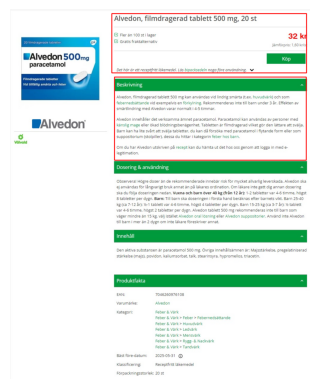

In [14]:
# Optional : get an image showing the rectangles on the image (To ensure the input)
image_with_rectangle = drawer.get_image_with_rectangles() # Extra

plt.imshow(cv2.cvtColor(image_with_rectangle, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [55]:
bh.save_output_images(image_with_rectangle,'roi_rect.jpg')

In [15]:
images = drawer.get_roi_images(coords)

image_1, image_2 = images # NOTE: Only Define as many images as you have!

images

[array([[[255, 255, 254],
         [255, 255, 254],
         [255, 255, 255],
         ...,
         [255, 254, 255],
         [255, 254, 255],
         [255, 254, 255]],
 
        [[253, 253, 255],
         [253, 254, 255],
         [255, 254, 255],
         ...,
         [255, 255, 255],
         [255, 254, 255],
         [255, 253, 255]],
 
        [[251, 253, 255],
         [251, 254, 255],
         [253, 255, 255],
         ...,
         [255, 254, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[250, 247, 255],
         [255, 253, 255],
         [255, 254, 255],
         ...,
         [255, 254, 255],
         [255, 255, 254],
         [255, 254, 254]],
 
        [[254, 251, 255],
         [253, 251, 255],
         [255, 254, 255],
         ...,
         [255, 254, 255],
         [255, 255, 255],
         [251, 251, 251]],
 
        [[253, 254, 255],
         [253, 254, 255],
         [254, 253, 255],
         ...,
         [255, 253, 255],
  

In [16]:
print(image_1) # First ROI image

[[[255 255 254]
  [255 255 254]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 [[253 253 255]
  [253 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 253 255]]

 [[251 253 255]
  [251 254 255]
  [253 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[250 247 255]
  [255 253 255]
  [255 254 255]
  ...
  [255 254 255]
  [255 255 254]
  [255 254 254]]

 [[254 251 255]
  [253 251 255]
  [255 254 255]
  ...
  [255 254 255]
  [255 255 255]
  [251 251 251]]

 [[253 254 255]
  [253 254 255]
  [254 253 255]
  ...
  [255 253 255]
  [254 253 255]
  [252 254 255]]]


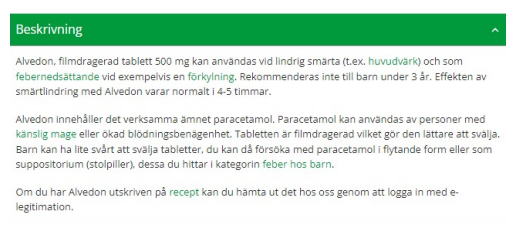

In [17]:
# Show the first ROI image
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

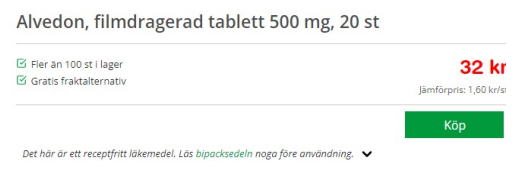

In [19]:
# Second... etc
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Text To Speech

### Prepare Text

In [52]:
# NOTE: Change the following variable to switch between images/rois:

test_roi = image_1

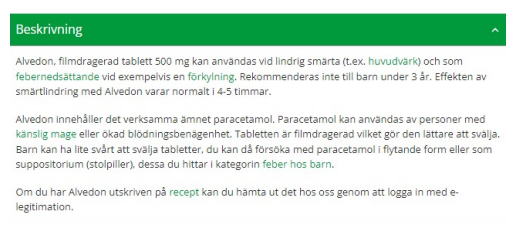

In [21]:
plt.imshow(cv2.cvtColor(test_roi, cv2.COLOR_BGR2RGB)) # First ROI
plt.axis('off')
plt.show()

In [53]:
# Test Getting titles:
tts.extract_biggest_title(test_roi)

'Beskrivning'

In [36]:
# Extract text 
test_roi_text = tts.extract_text_from_image(test_roi)
print(test_roi_text)

Alvedon, filmdragerad tablett 500 mg, 20 st
Z Fler än 100 st i lager 32 kr
Z Gratis fraktalternativ
Jämförpris: 1,60 kr/s
Det hör är ett receptfritt läkemedel. Läs bipacksedeln noga före användning. v



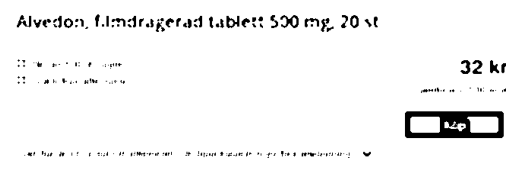

In [37]:
# Enhance before
test_roi_enhanced = tts.enhance_image(test_roi)

# Optimal : Show the enchanced image that the computer 'sees' visually.
plt.imshow(cv2.cvtColor(test_roi_enhanced, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [38]:
# Extract from enhanced :
enhanced_test_roi_text = tts.extract_text_from_image(test_roi)
print(enhanced_test_roi_text)

Alvedon, filmdragerad tablett 500 mg, 20 st
Z Fler än 100 st i lager 32 kr
Z Gratis fraktalternativ
Jämförpris: 1,60 kr/s
Det hör är ett receptfritt läkemedel. Läs bipacksedeln noga före användning. v



In [39]:
# Difference TODO: There really should be??
enhanced_test_roi_text == test_roi_text

True

### Translate Text

In [27]:
# swe -> eng # TODO: Optional to translate
# tts.translate_text(enhanced_image_1_text,'en')
# ocument the laguage change
# Language is default swedish , code : '--oem 3 --psm 6 -l swe'
# Currently input is swe, but output is eng, is theis wierd? Change?

### Summarize Text

In [45]:
summarized_text = tts.summarize_text(enhanced_test_roi_text,
                                     max_char=300, # Default
                                     summary_div=3) # Default


In [46]:
print(summarized_text) # TODO: Format better

Alvedon 500 mg, 20 st, pris 32 kr, gratis frakt. Receptfritt läkemedel, läs bipacksedeln noga.


In [47]:
len(enhanced_test_roi_text)/len(summarized_text)
# amount of characters are reduced by following nr :
# Compare it to the passed division to analyze sucess

2.1382978723404253

In [48]:
# Se wordcount:
sen_len , sen = count_words(summarized_text,
                            ret_words = True) # Default False
print(sen_len)

15


In [49]:
# If you want access to the split words, pass ret_words=True (default False)
sen

['Alvedon',
 '500',
 'mg,',
 '20',
 'st,',
 'pris',
 '32',
 'kr,',
 'gratis',
 'frakt.',
 'Receptfritt',
 'läkemedel,',
 'läs',
 'bipacksedeln',
 'noga.']

### Read Out Text/Summary

In [50]:
# tts.read_text(summarized_text)

In [34]:
# TODO:
# transltor
# Resize to fit screen
# Let user name the image
# Merge img and rect mods?????
# format text